In [1]:
import xarray as xr
import metpy
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# These are the monthly mean SSTs
mean_sst = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc')
mean_sst

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2018, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/38)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2022-03-07
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
# only shows the nino 3.4 regionand data is quality assured from 1979 in ERA5 (43 years)
mean_sst_nino34 = mean_sst.sel(time=slice('1979','2022'), lat=slice(5, -5), lon=slice(190, 240))
# must do slice this way b/c lat = high to low and lon = low to high
# 120 W is 240 E

In [5]:
# Compute the Anomalies
# group by month and subtract the mean SSt at each point
group = mean_sst_nino34.groupby('time.month')
sst_std_anom_nino34 = (group - group.mean(dim='time')) / group.std(dim='time')
sst_std_anom_nino34
# 5 month rolling mean (smooths the data)
rolling_std_anom = sst_std_anom_nino34.sst.rolling(time=3).mean()
final = rolling_std_anom.mean(dim='lat').mean(dim='lon')
# Select just one month since we dont need that dimension
final = final.sel(month=1)

Text(0.5, 1.0, 'Niño 3.4 Standardized Anomalies from 1979-2022')

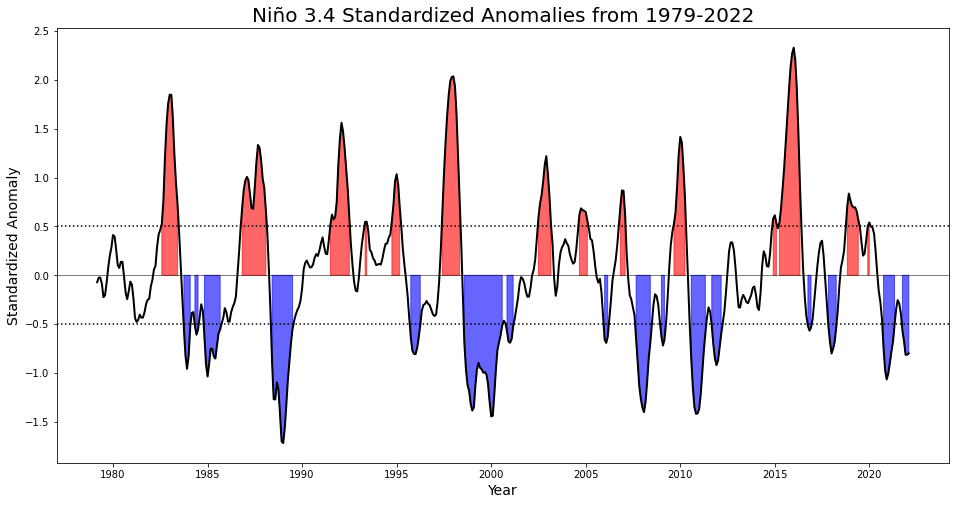

In [23]:
fig = plt.figure(figsize=(16, 8))

# Not so sure the fill between will exactly work
plt.fill_between(final.time, final.where(final.values >= 0.5),
    color='red', alpha=0.6)

plt.fill_between(final.time, final.where(final.values <= -0.5),
    color='blue',alpha=0.6)

plt.plot(final.time, final.values,linewidth=2,color='black')
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.5, color='black', linewidth=1.5, linestyle='dotted')
plt.axhline(-0.5, color='black', linewidth=1.5, linestyle='dotted')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Standardized Anomaly',fontsize=14)
plt.title('Niño 3.4 Standardized Anomalies from 1979-2022',fontsize=20)


In [47]:
#quality assured from 1979 in ERA5 (43 years)
mean_sst_nino34 = mean_sst.sel(time=slice('1979','2022'))

# Compute the Anomalies
# group by month and subtract the mean SSt at each point
group = mean_sst_nino34.groupby('time.month')
sst_std_anom_nino34 = (group - group.mean(dim='time')) / group.std(dim='time')
sst_std_anom_nino34
# 5 month rolling mean (smooths the data)
rolling_std_anom = sst_std_anom_nino34.sst.rolling(time=3).mean()
final = rolling_std_anom.mean(dim='lat').mean(dim='lon')
# Select just one month since we dont need that dimension
final = final.sel(month=1)

nino=rolling_std_anom.sel(time='2015-11-01', month=1)
nina=rolling_std_anom.sel(time='1988-11-01', month=1)

Text(0.5, 1.0, 'El Niño 3.4 Standardized Anomalies: 2015-11')

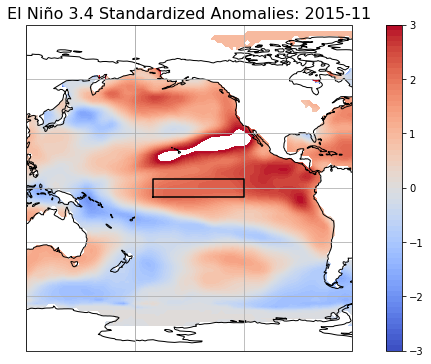

In [98]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=190))
ax.coastlines()
ax.gridlines()
ax.set_extent((120, 300, 10, -10))

c = ax.contourf(nino.lon, nino.lat, nino.values, levels = np.arange(-3,3.01,0.1), transform=cartopy.crs.PlateCarree(), cmap='coolwarm')
coord = [[190, -5], [240, -5], [240, 5], [190, 5]]
coord.append(coord[0])
xs, ys = zip(*coord)
plt.plot(xs, ys, transform=cartopy.crs.PlateCarree(), color = 'black', zorder = 15)

plt.colorbar(c, orientation='vertical', ticks = np.arange(-3,3.1,1))
plt.title('El Niño 3.4 Standardized Anomalies: 2015-11', fontsize=16)

Text(0.5, 1.0, 'La Niña 3.4 Standardized Anomalies: 1988-11')

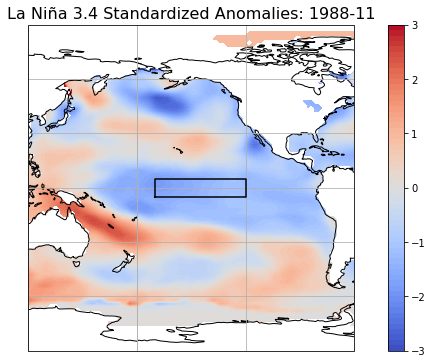

In [95]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=190))
ax.coastlines()
ax.gridlines()
ax.set_extent((120, 300, 10, -10))

c = ax.contourf(nina.lon, nina.lat, nina.values, levels = np.arange(-3,3.01,0.1), transform=cartopy.crs.PlateCarree(), cmap='coolwarm')
coord = [[190, -5], [240, -5], [240, 5], [190, 5]]
coord.append(coord[0])
xs, ys = zip(*coord)
plt.plot(xs, ys, transform=cartopy.crs.PlateCarree(), color = 'black', zorder = 15)

plt.colorbar(c, orientation='vertical',  ticks = np.arange(-3,3.01,1))
plt.title('La Niña 3.4 Standardized Anomalies: 1988-11', fontsize=16)

In [143]:
# Most recent dates
recent_sst = xr.open_dataset('https://www.ncei.noaa.gov/thredds/dodsC/ncFC/fc-oisst-daily-avhrr-only-dly/OISST_Daily_AVHRR-only_Feature_Collection_best.ncd')
recent_sst # Daily at 12Z from 2/28/2020 to 3/6/2022
# This shows the 3.4 region and the most recent data
recent_sst_nino34 = recent_sst.sel(time='2022-03-05', zlev=0).squeeze()
# The slice has to be the other way on this one for lat since it goes from low to high here
recent_sst_nino34.anom
# you can squezze something with aa dimension of 1 which time has here


<xarray.DataArray 'anom' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
    zlev      float32 0.0
  * lat       (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    time      datetime64[ns] 2022-03-05T12:00:00
    time_run  datetime64[ns] ...
Attributes:
    units:        Celsius
    long_name:    Daily sea surface temperature anomalies
    _ChunkSizes:  [   1    1  720 1440]

Text(0.5, 1.0, 'Current Niño 3.4 Standardized Anomalies: 2022-03-05')

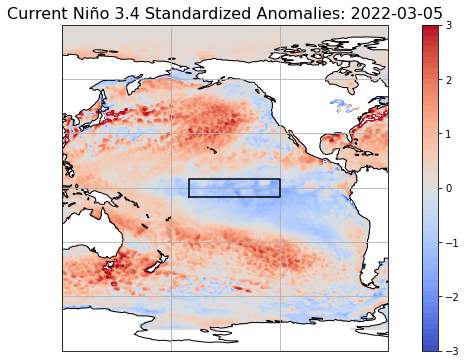

In [144]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=190))
ax.coastlines()
ax.gridlines()
ax.set_extent((120, 300, 10, -10))

c = ax.contourf(recent_sst_nino34.lon, recent_sst_nino34.lat, recent_sst_nino34.anom, levels = np.arange(-3,3.01,0.1), transform=cartopy.crs.PlateCarree(), cmap='coolwarm')
coord = [[190, -5], [240, -5], [240, 5], [190, 5]]
coord.append(coord[0])
xs, ys = zip(*coord)
plt.plot(xs, ys, transform=cartopy.crs.PlateCarree(), color = 'black', zorder = 15)

plt.colorbar(c, orientation='vertical', ticks = np.arange(-3,3.01,1))
plt.title('Current Niño 3.4 Standardized Anomalies: 2022-03-05', fontsize=16)
